In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,hourly,yearly,Average Salary,job_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,"NAMS2 - Data Scientist I, II, III",$101K\r\n/yr,Company Description\r\n\r\nCrown is a leader i...,3.8,"Crown Consulting, Inc.","Mountain View, CA",201 to 500 Employees,1989.0,Company - Private,National Agencies,...,0,1,101.0,CA,35.0,0,0,0,0,0
1,Data Scientist,$121K\r\n/yr,Title: Data Scientist - Big Data Engineer\r\nP...,3.1,Radiant Digital,"Austin, TX",201 to 500 Employees,2000.0,Company - Private,Enterprise Software & Network Solutions,...,0,1,121.0,TX,24.0,1,0,0,1,0
2,Data Scientist,$57.50\r\n/hr,Proven experience in data conversion and repor...,Not listed,Tekfocus Minds LLC,Remote,Unknown,NaN,Company - Public,--,...,1,0,57.5,Remote,NaN,1,0,0,1,0
3,Data Scientist,$55.50\r\n/hr,Job Overview:\r\nThe Office of the Attorney Ge...,5.0,Advanced Proactive Solutions LLC,"Austin, TX",Unknown,NaN,Company - Private,Security & Protective,...,1,0,55.5,TX,NaN,1,0,0,1,0
4,"Data Scientist, Data Lake",$90K\r\n/yr,"For over 90 years, Topcon’s vision has been to...",3.2,Topcon Healthcare,"La Jolla, CA",201 to 500 Employees,NaN,Company - Public,Health Care Services & Hospitals,...,0,1,90.0,CA,NaN,1,0,0,1,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'yearly', 'Average Salary',
       'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [6]:
df['job_simplified'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simplified.value_counts()

job_simplified
data scientist    623
na                 10
analyst             3
Name: count, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

seniority
na        534
senior    102
Name: count, dtype: int64

In [9]:
##  Fix states
df['job_state'] = df.job_state.apply(lambda x: 'CA' if x =='California' else 'MD' if x =='Maryland' else 'ND' if x == 'North Dakota' else 'VA' if x == 'Virginia' else 'MI' if x == 'Michigan' else x)
df.job_state.value_counts()

job_state
CA               134
TX                55
VA                50
Remote            44
MA                43
United States     41
WA                38
MD                31
DC                28
IL                23
GA                22
FL                13
MI                13
UT                12
NY                10
OH                10
NC                 9
CO                 9
TN                 8
AL                 7
ND                 6
AZ                 6
KS                 5
NE                 5
PA                 4
WI                 3
MN                 3
IN                 2
IA                 1
NJ                 1
Name: count, dtype: int64

In [10]:
##  Job description length 
df['desc_length'] = df['Job Description'].apply(lambda x: len(x))
df['desc_length'] 

0      2751
1      2665
2      1092
3      4272
4      5748
       ... 
631    4378
632    3779
633    2831
634    9883
635    2572
Name: desc_length, Length: 636, dtype: int64

In [11]:
## hourly wage to annual 
df['Average Salary'] = df.apply(lambda x: (x['Average Salary'])*2 if x.hourly==1 else x['Average Salary'], axis = 1)

In [12]:
df[df.hourly==1][['hourly', 'Average Salary']]

,hourly,Average Salary
2,1,115.0
3,1,111.0
29,1,115.0
30,1,111.0
94,1,115.0
95,1,111.0
185,1,115.0
186,1,111.0
302,1,115.0
303,1,111.0


In [13]:
df['Company Name']

0                   Crown Consulting, Inc.
1                          Radiant Digital
2                       Tekfocus Minds LLC
3         Advanced Proactive Solutions LLC
4                        Topcon Healthcare
                      ...                 
631                               HelloGov
632                       World Bank Group
633    University of Alabama at Birmingham
634                                 PayPal
635    University of California, Riverside
Name: Company Name, Length: 636, dtype: object

In [14]:
df.describe()

,Founded,hourly,yearly,Average Salary,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_length
count,520.000000,636.000000,636.000000,636.000000,520.000000,636.000000,636.0,636.000000,636.000000,636.000000,636.000000
mean,1942.138462,0.022013,0.977987,131.639937,54.588462,0.836478,0.0,0.168239,0.424528,0.476415,5306.017296
std,231.635510,0.146840,0.146840,38.580084,45.568892,0.370132,0.0,0.374373,0.494660,0.499837,2735.363839
min,-1.000000,0.000000,0.000000,68.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,806.000000
25%,1939.000000,0.000000,1.000000,108.000000,20.000000,1.000000,0.0,0.000000,0.000000,0.000000,3672.000000
50%,1984.000000,0.000000,1.000000,122.000000,40.000000,1.000000,0.0,0.000000,0.000000,0.000000,5091.000000
75%,2004.000000,0.000000,1.000000,152.000000,83.000000,1.000000,0.0,0.000000,1.000000,1.000000,6368.000000
max,2022.000000,1.000000,1.000000,445.000000,278.000000,1.000000,0.0,1.000000,1.000000,1.000000,18224.000000


In [15]:
df['Rating'] = df['Rating'].apply(lambda x : -1 if x =='Not listed' else x)
df['Rating'] = df['Rating'].astype(float)

<Axes: >

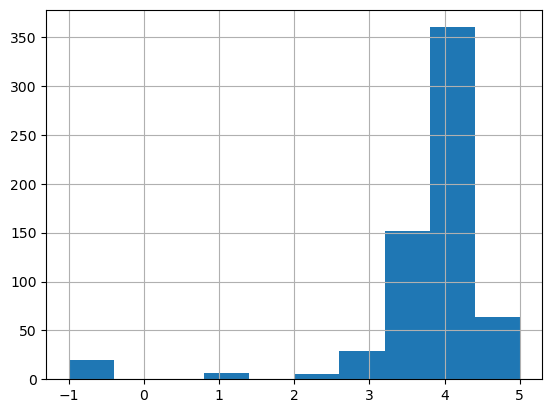

In [16]:
df.Rating.hist()

<Axes: >

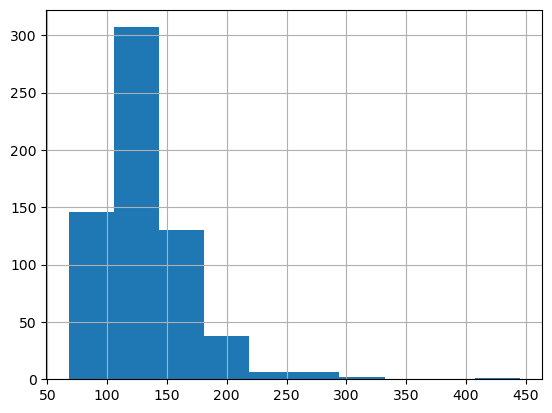

In [17]:
df['Average Salary'].hist()

<Axes: >

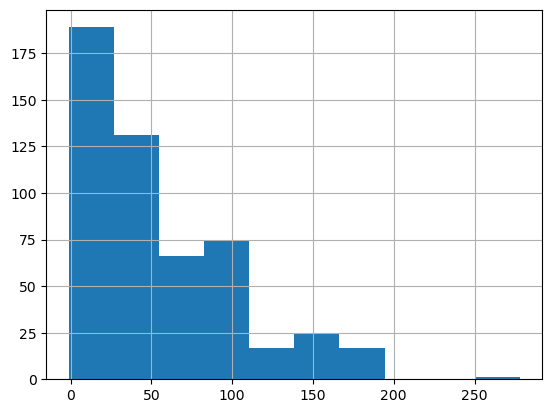

In [18]:
df.age.hist()

<Axes: >

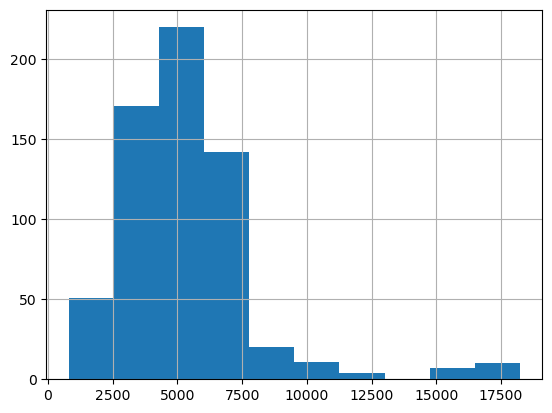

In [19]:
df.desc_length.hist()

In [20]:
df['Average Salary'].boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

<Axes: >

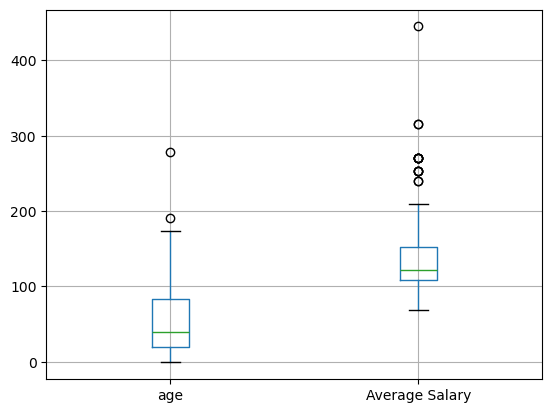

In [27]:
df.boxplot(column = ['age', 'Average Salary'])

<Axes: >

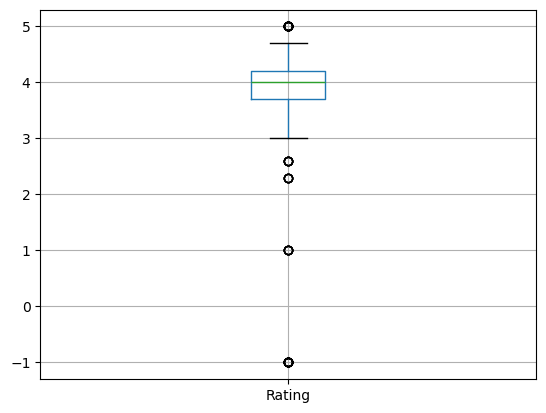

In [29]:
df.boxplot(column = 'Rating')

In [31]:
df[['age','Average Salary','Rating','desc_length']].corr()

,age,Average Salary,Rating,desc_length
age,1.000000,-0.328085,0.228765,0.015343
Average Salary,-0.328085,1.000000,0.015466,0.042681
Rating,0.228765,0.015466,1.000000,0.187049
desc_length,0.015343,0.042681,0.187049,1.000000


<Axes: >

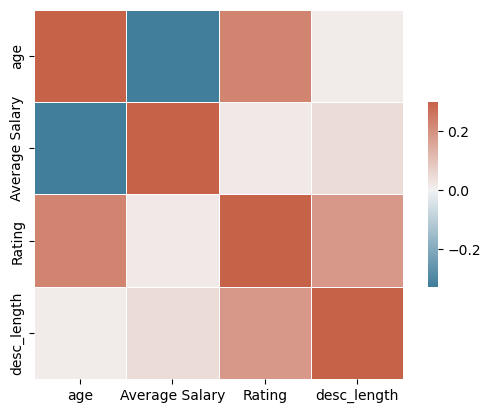

In [33]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df[['age','Average Salary','Rating','desc_length']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [35]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'yearly', 'Average Salary',
       'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simplified', 'seniority', 'desc_length'],
      dtype='object')

In [37]:
df_categ = df[[ 'Company Name', 'Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simplified', 'seniority']]

graph for Company Name: total = 141


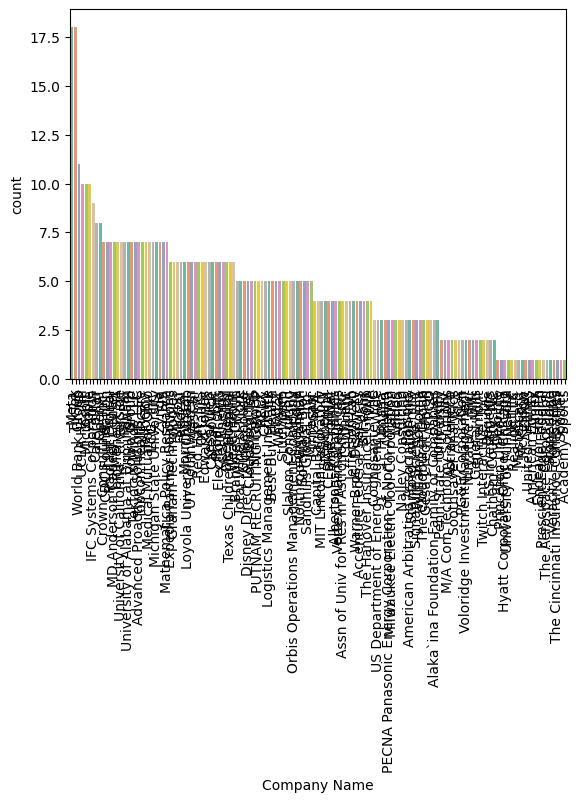

graph for Location: total = 93


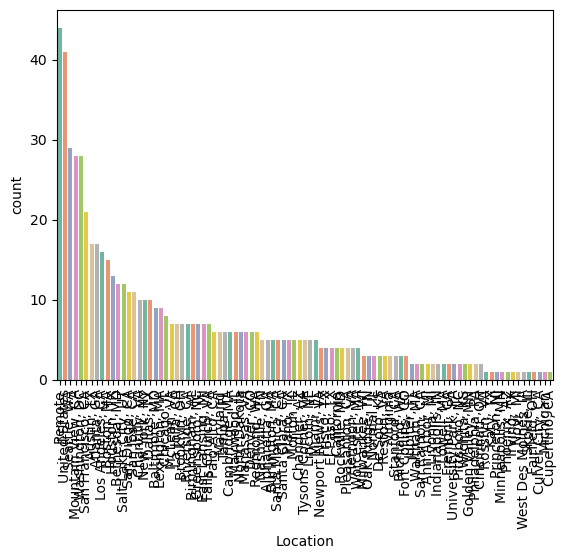

graph for Size: total = 9


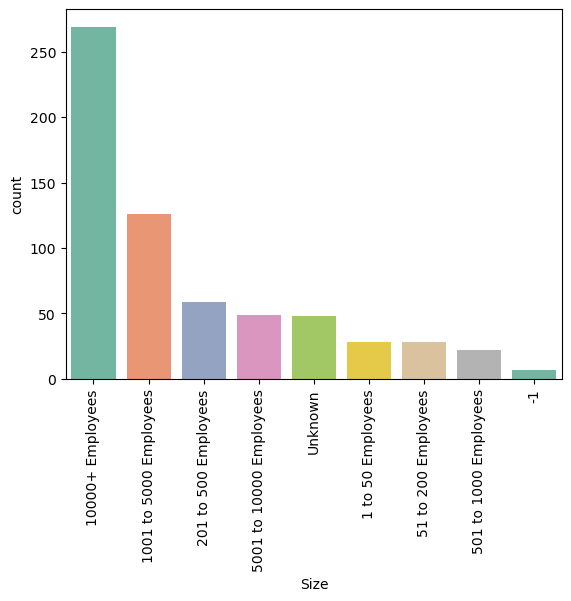

graph for Type of ownership: total = 9


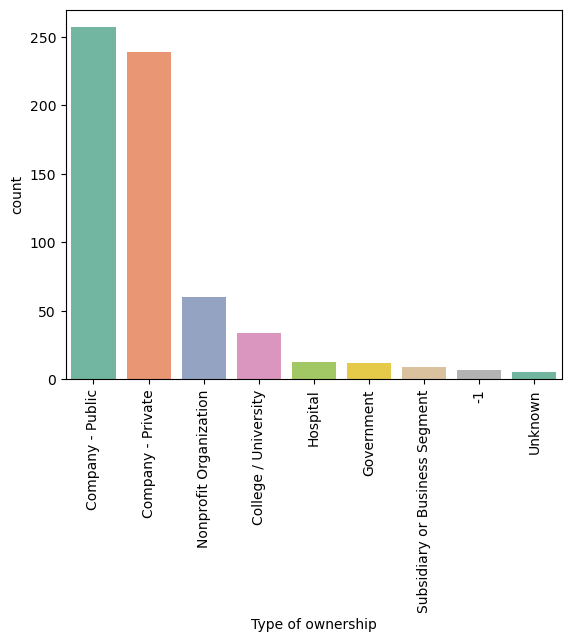

graph for Industry: total = 39


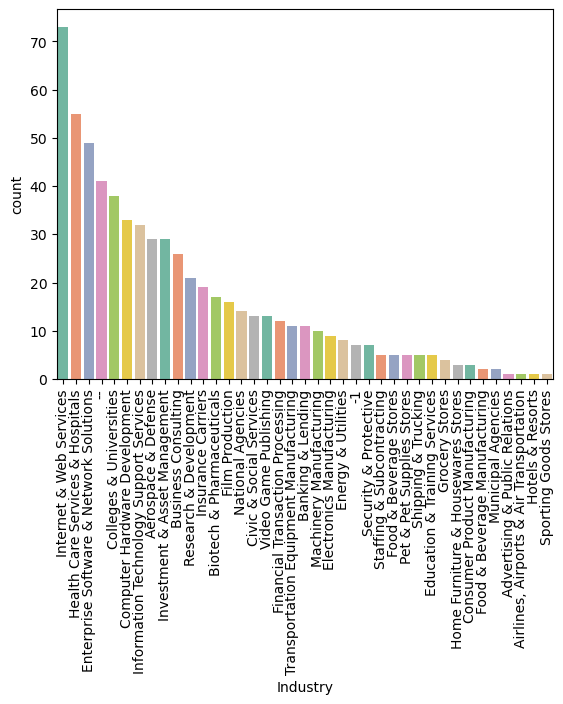

graph for Sector: total = 19


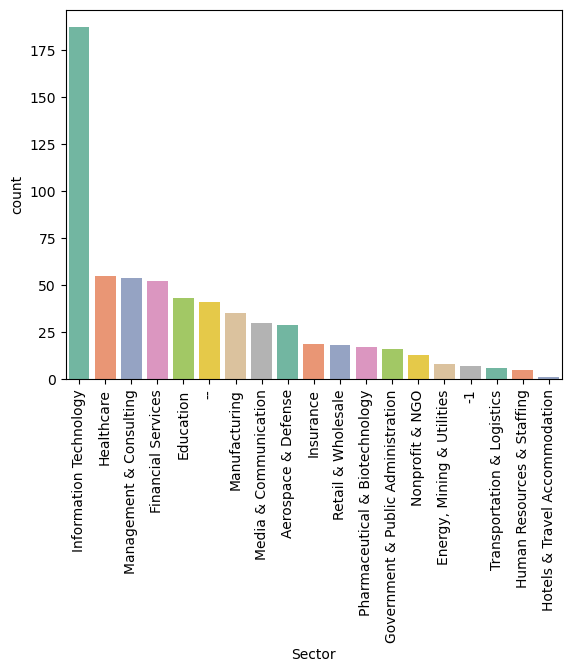

graph for Revenue: total = 10


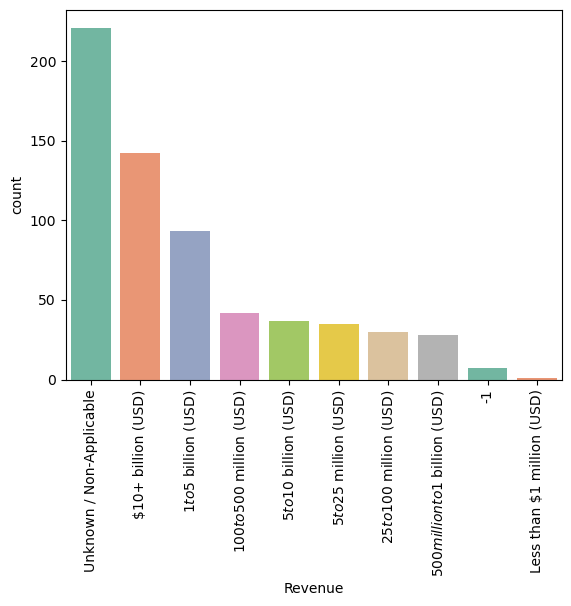

graph for job_state: total = 30


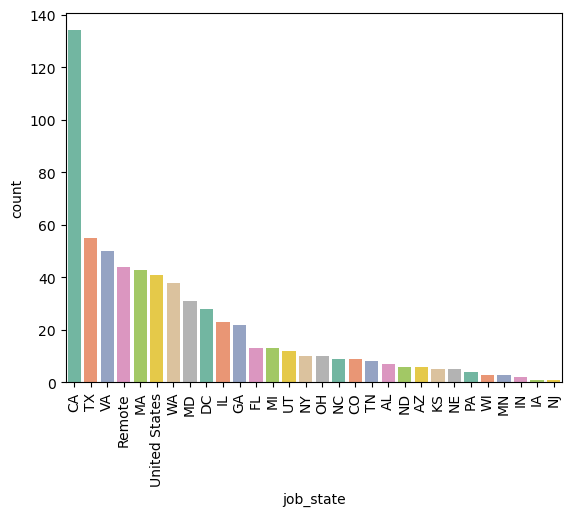

graph for python_yn: total = 2


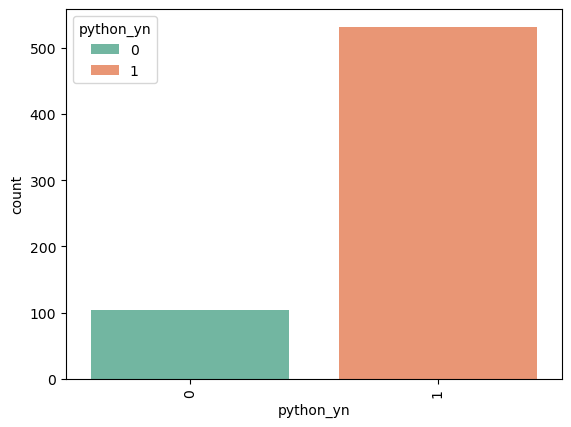

graph for R_yn: total = 1


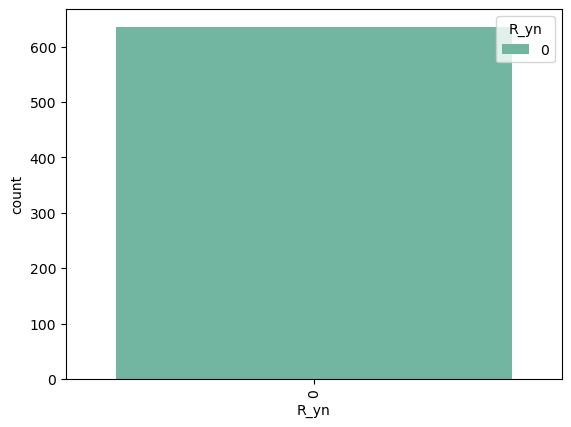

graph for spark_yn: total = 2


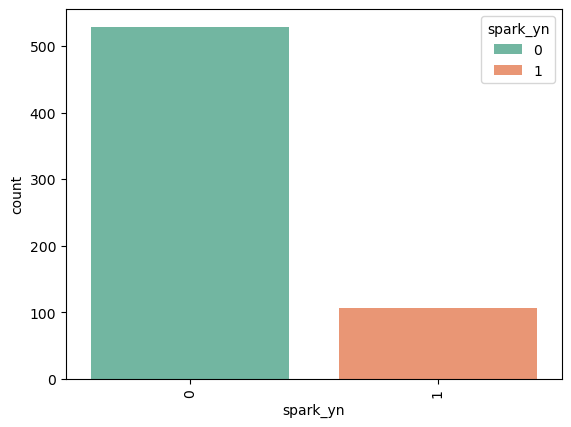

graph for aws_yn: total = 2


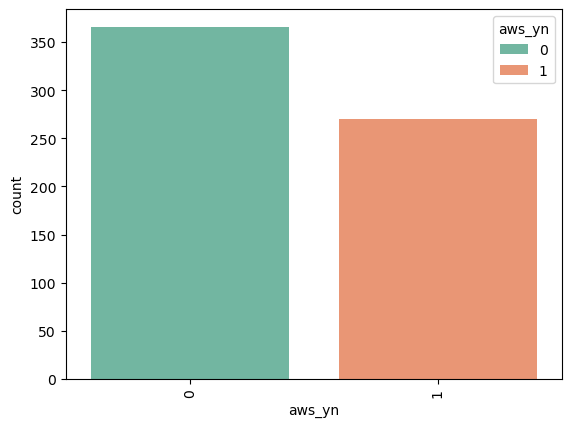

graph for excel_yn: total = 2


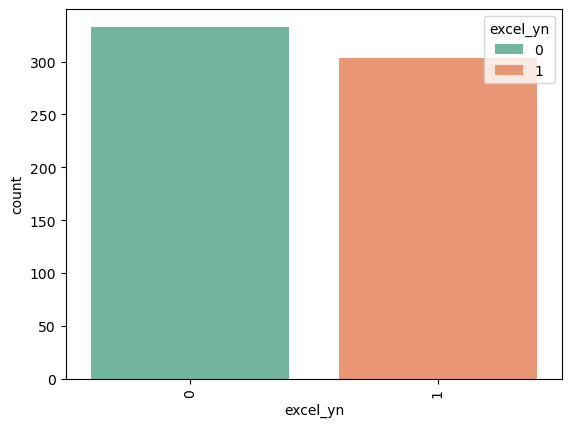

graph for job_simplified: total = 3


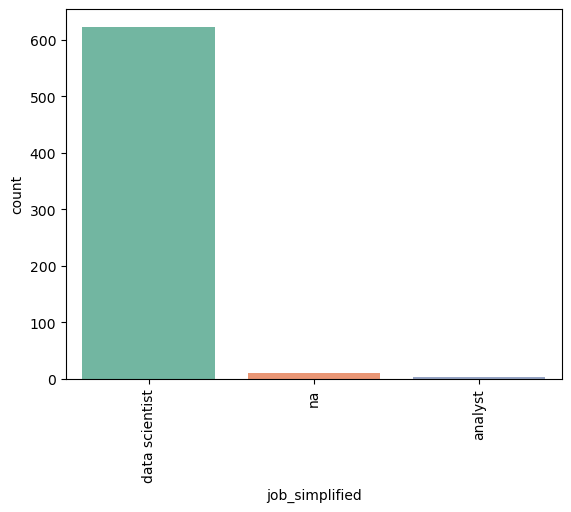

graph for seniority: total = 2


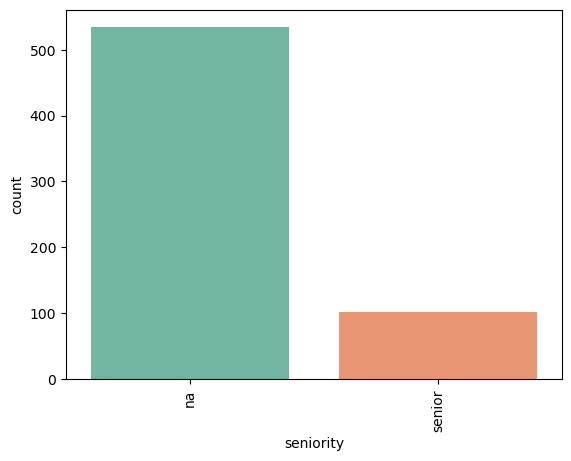

In [39]:
for i in df_categ.columns:
    categ_num = df_categ[i].value_counts()
    print("graph for %s: total = %d" % (i, len(categ_num)))
    chart = sns.barplot(x=categ_num.index, y=categ_num, hue = categ_num.index, palette='Set2')
    chart.set_xticks(chart.get_xticks()) 
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Company Name: total = 20


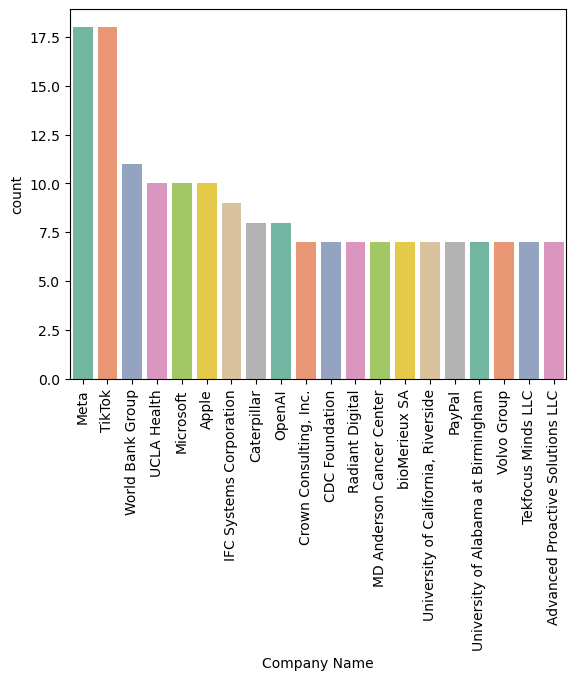

graph for Location: total = 20


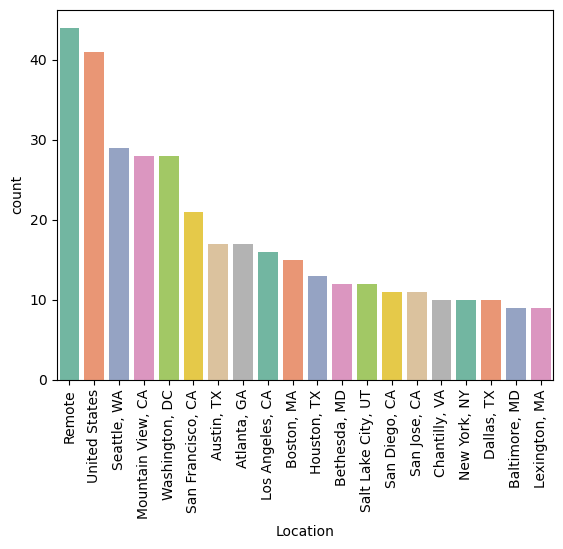

In [40]:
for i in df_categ[['Company Name', 'Location']].columns:
    categ_num = df_categ[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(categ_num)))
    chart = sns.barplot(x=categ_num.index, y=categ_num, hue = categ_num.index, palette='Set2')
    chart.set_xticks(chart.get_xticks()) 
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [41]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'yearly', 'Average Salary',
       'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simplified', 'seniority', 'desc_length'],
      dtype='object')

In [42]:
pd.pivot_table(df, index = 'job_simplified', values = 'Average Salary')

,Average Salary
job_simplified,
analyst,108.000000
data scientist,131.874799
na,124.100000


In [43]:
pd.pivot_table(df, index = ['job_simplified', 'seniority'], values = 'Average Salary')

Average Salary
job_simplified seniority                
analyst        senior         108.000000
data scientist na             127.830153
               senior         153.282828
na             na             124.100000

In [49]:
pd.pivot_table(df, index = ['job_state', 'job_simplified'], values = 'Average Salary', aggfunc = 'count').sort_values('job_state', ascending = False)

Average Salary
job_state     job_simplified                
WI            data scientist               3
WA            data scientist              35
              analyst                      3
VA            data scientist              50
United States data scientist              41
UT            data scientist              12
TX            data scientist              55
TN            data scientist               8
Remote        data scientist              44
PA            data scientist               4
OH            data scientist              10
NY            data scientist              10
NJ            data scientist               1
NE            data scientist               5
ND            data scientist               6
NC            data scientist               9
MN            data scientist               3
MI            data scientist              13
MD            data scientist              28
              na                           3
MA            na                           2
              data scientist              41
KS            data scientist               5
IN            data scientist               2
IL            data scientist              23
IA            data scientist               1
GA            na                           1
              data scientist              21
FL            data scientist              13
DC            data scientist              28
CO            data scientist               9
CA            data scientist             130
              na                           4
AZ            data scientist               6
AL            data scientist               7

In [51]:
pd.pivot_table(df[df.job_simplified == 'data scientist'], index = 'job_state', values = 'Average Salary').sort_values('Average Salary', ascending = False)

,Average Salary
job_state,
WA,178.371429
Remote,152.727273
NY,151.100000
CA,149.746154
MA,140.780488
United States,139.121951
VA,135.180000
IN,130.000000
MD,125.571429


In [53]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'yearly', 'Average Salary',
       'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simplified', 'seniority', 'desc_length'],
      dtype='object')

In [55]:
df_pivots=df[['Rating', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Average Salary']] 

In [57]:
for i in df_pivots.columns:
    #print(i)
    print(pd.pivot_table(df, index = i, values = 'Average Salary').sort_values('Average Salary', ascending = False))

        Average Salary
Rating                
 3.2        174.040000
 2.6        173.000000
 4.4        170.304348
 4.7        149.333333
 4.2        142.083333
 3.4        141.000000
 4.6        137.000000
 3.0        135.000000
 4.0        131.448276
 3.5        130.850000
 4.1        130.032609
 3.9        128.888889
 3.6        127.050000
 3.8        127.019608
-1.0        126.550000
 5.0        124.304348
 1.0        123.000000
 4.5        117.571429
 2.3        117.000000
 3.3        116.181818
 3.7        115.129630
 3.1        113.888889
 4.3        106.909091
                                Average Salary
Type of ownership                             
-1                                  164.000000
Subsidiary or Business Segment      144.333333
Company - Public                    137.396887
Nonprofit Organization              133.466667
Government                          129.666667
Company - Private                   129.405858
Unknown                             120.000000
Ho

ValueError: Grouper for 'Average Salary' not 1-dimensional

In [63]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'Average Salary', aggfunc= 'count')

python_yn,0,1
Revenue,,
$1 to $5 billion (USD),23.0,70.0
$10+ billion (USD),16.0,126.0
$100 to $500 million (USD),14.0,28.0
$25 to $100 million (USD),6.0,24.0
$5 to $10 billion (USD),3.0,34.0
$5 to $25 million (USD),8.0,27.0
$500 million to $1 billion (USD),6.0,22.0
-1,NaN,7.0
Less than $1 million (USD),NaN,1.0


In [79]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [67]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.4 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.4 kB 487.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.4 kB 901.1 kB/s eta 0:00:01
   ------------------------- -------------- 194.6/301.4 kB 1.2 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/301.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.3 MB/s eta 0:00:00


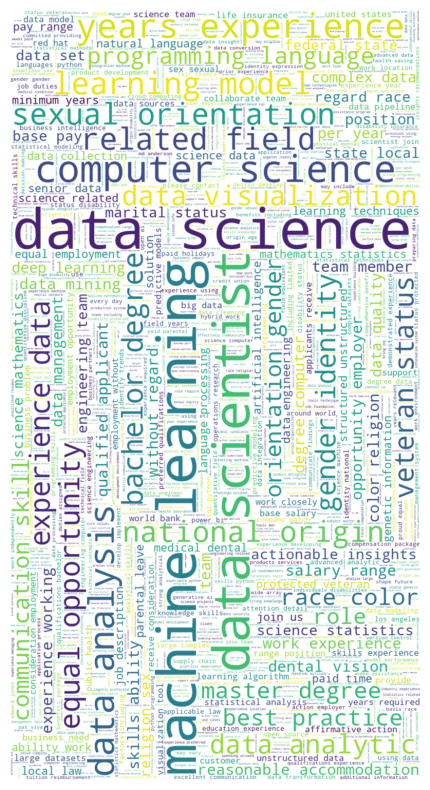

In [91]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [83]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [87]:
import nltk
nltk.download('word_tokenize')

[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index


False

In [89]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True